<h2 style="color:rgb(0,120,170)"> Predictive Analysis - Image Processing</h2>

#### Classify handwritten digits using the famous MNIST data

The goal in this task is to take an image of a handwritten single digit, and determine what that digit is.  

The data for this competition were taken from the MNIST dataset. The MNIST ("Modified National Institute of Standards and Technology") dataset is a classic within the Machine Learning community that has been extensively studied.  More detail about the dataset, including Machine Learning algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html.

In [0]:
import os
import sys
import time
import glob
import math
import random
import pickle
import pylab
from zipfile import ZipFile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.font_manager import FontProperties
from matplotlib import pyplot

from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.decomposition import PCA

import tensorflow as tf

%matplotlib inline
#matplotlib.rcdefaults()
#matplotlib.verbose.set_level('silent')
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

from IPython.display import Image
from IPython.core.display import HTML

In [0]:
datapath = os.path.join(os.getcwd(), 'data')
print(datapath)

/Workspace/Repos/renato.rocha-souza@rbinternational.com/Contribute_Data_Science_Apex/2_virtual_classroom_materials/day_6_advanced_topics_RBI/data


In [0]:
# read training data from CSV file 

with ZipFile(os.path.join(datapath, 'kaggle_digits_train.zip'), 'r') as myzip:
    with myzip.open('kaggle_digits_train.csv') as myfile:
        train_data = pd.read_csv(myfile)
        
with ZipFile(os.path.join(datapath, 'kaggle_digits_test.zip'), 'r') as myzip:
    with myzip.open('kaggle_digits_test.csv') as myfile:
        test_data = pd.read_csv(myfile)

print('data({0[0]},{0[1]})'.format(train_data.shape))
train_data.head()

data(42000,785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Every image is a "stretched" array of pixel values.  
In this case it's 784 pixels => 28 * 28 px

In [0]:
sample_size = 4200

images = train_data.iloc[:sample_size, 1:].values   # Decreasing the number of images to save memory
images = images.astype(np.float16)

# convert from [0:255] => [0.0:1.0]
images = np.multiply(images, 1.0 / 255.0)

print('images numpy array have shape: ({0[0]},{0[1]})'.format(images.shape))

images numpy array have shape: (4200,784)


In [0]:
images

Out[152]: array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)

In [0]:
image_size = images.shape[1]
print ('image_size => {0}'.format(image_size))

# in this case all images are square
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)

print ('image_width => {0}\nimage_height => {1}'.format(image_width,image_height))

image_size => 784
image_width => 28
image_height => 28


In [0]:
IMAGE_TO_DISPLAY = 10
#plt.install_repl_displayhook()
#plt.imshow(images[IMAGE_TO_DISPLAY].reshape((28, 28)), cmap=cm.binary)

In [0]:
labels_flat = train_data.iloc[:sample_size, 0].values   # Adjusting the number of labels to the number of images selected

print('labels_flat({0})'.format(len(labels_flat)))
print ('labels_flat[{0}] => {1}'.format(IMAGE_TO_DISPLAY,labels_flat[IMAGE_TO_DISPLAY]))

labels_flat(4200)
labels_flat[10] => 8


In [0]:
plt.figure(figsize=(12,6))
for i in range(0,9):
    plt.subplot(250 + (i+1))
    img = images[i,:].reshape(28, 28)
    plt.imshow(img, cmap='Greys')
    plt.title(labels_flat[i])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fafcc3c1160> (for post_execute):
<Figure size 864x432 with 9 Axes>

In [0]:
labels_count = np.unique(labels_flat).shape[0]

print('labels_count => {0}'.format(labels_count))

labels_count => 10


In [0]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test_images = test_data.values.astype(np.float16)
test_images.shape

Out[159]: (28000, 784)

In [0]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(images, 
                                                                    labels_flat, 
                                                                    test_size=0.4, 
                                                                    random_state=0)
print('train images({0[0]},{0[1]})'.format(X_train.shape))
print('validation images({0[0]},{0[1]})'.format(X_test.shape))
print('train labels({})'.format(y_train.shape))
print('validation labels({})'.format(y_test.shape))

train images(2520,784)
validation images(1680,784)
train labels((2520,))
validation labels((1680,))


In [0]:
del(images)  #save memory

In [0]:
from sklearn.ensemble import RandomForestClassifier

# create and train the random forest
# multi-core CPUs can use: rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
clf_rf = RandomForestClassifier(n_estimators=300, 
                                criterion='gini', 
                                max_depth=None, 
                                min_samples_split=3, 
                                min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, 
                                max_features='auto', 
                                max_leaf_nodes=None, 
                                bootstrap=True, 
                                oob_score=False, 
                                n_jobs=-1, 
                                random_state=0, 
                                verbose=0, 
                                warm_start=False, 
                                class_weight=None).fit(X_train, y_train)

eval_rf = clf_rf.score(X_test, y_test)
print(eval_rf)

0.9392857142857143


In [0]:
# Train SVM...
from sklearn import svm
#http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

clf_svm = svm.SVC(kernel='poly',
                  C=1.57,
                  degree=2, 
                  gamma=0.278,
                  coef0=0.0, 
                  shrinking=True, 
                  probability=False, 
                  tol=0.001, 
                  cache_size=200, 
                  class_weight=None, 
                  verbose=False, 
                  max_iter=-1, 
                  random_state=0).fit(X_train, y_train)

eval_svm = clf_svm.score(X_test, y_test)
print(eval_svm)

0.9416666666666667


Making Predictions

In [0]:
predict_rf = clf_rf.predict(test_images)
predict_rf[0:10]

Out[164]: array([2, 0, 9, 9, 2, 7, 0, 3, 0, 3])

In [0]:
predict_svm = clf_svm.predict(test_images)
predict_svm[0:10]

Out[165]: array([2, 0, 9, 0, 2, 7, 0, 3, 0, 3])

### Using Tensor Flow (with a fully connected ANN)

In [0]:
import tensorflow as tf

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

Train: X=(2520, 28, 28), y=(2520,)
Test: X=(1680, 28, 28), y=(1680,)
<Figure size 720x576 with 9 Axes>

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
                                   ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 128)               100480    
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)

Epoch 1/10
252/252 [==============================] - 1s 4ms/step - loss: 0.7953 - accuracy: 0.7722 - val_loss: 0.3934 - val_accuracy: 0.8857
Epoch 2/10
252/252 [==============================] - 1s 3ms/step - loss: 0.3801 - accuracy: 0.8845 - val_loss: 0.3218 - val_accuracy: 0.9131
Epoch 3/10
252/252 [==============================] - 1s 2ms/step - loss: 0.2768 - accuracy: 0.9194 - val_loss: 0.2761 - val_accuracy: 0.9256
Epoch 4/10
252/252 [==============================] - 1s 3ms/step - loss: 0.2071 - accuracy: 0.9345 - val_loss: 0.2595 - val_accuracy: 0.9244
Epoch 5/10
252/252 [==============================] - 1s 4ms/step - loss: 0.1655 - accuracy: 0.9496 - val_loss: 0.2384 - val_accuracy: 0.9327
Epoch 6/10
252/252 [==============================] - 1s 3ms/step - loss: 0.1270 - accuracy: 0.9667 - val_loss: 0.2338 - val_accuracy: 0.9351
Epoch 7/10
252/252 [==============================] - 1s 3ms/step - loss: 0.1105 - accuracy: 0.9702 - val_loss: 0.2458 - val_accuracy: 0.9262
Epoch 

In [0]:
model.evaluate(X_test, y_test, verbose=1)

53/53 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.9315
Out[170]: [0.24500492215156555, 0.9315476417541504]

In [0]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


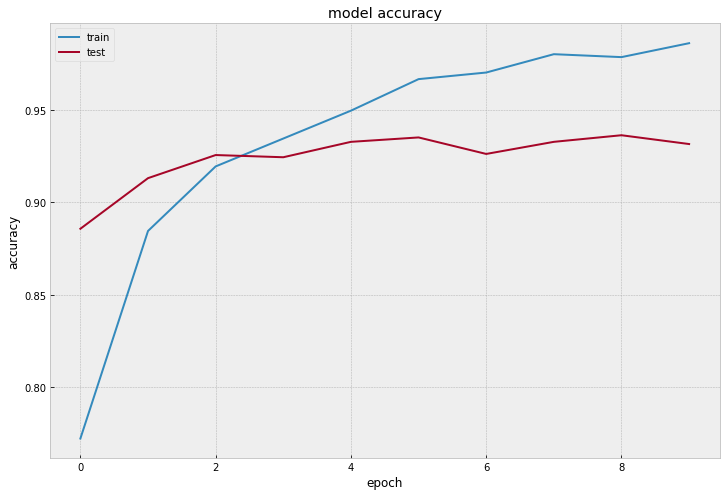

In [0]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

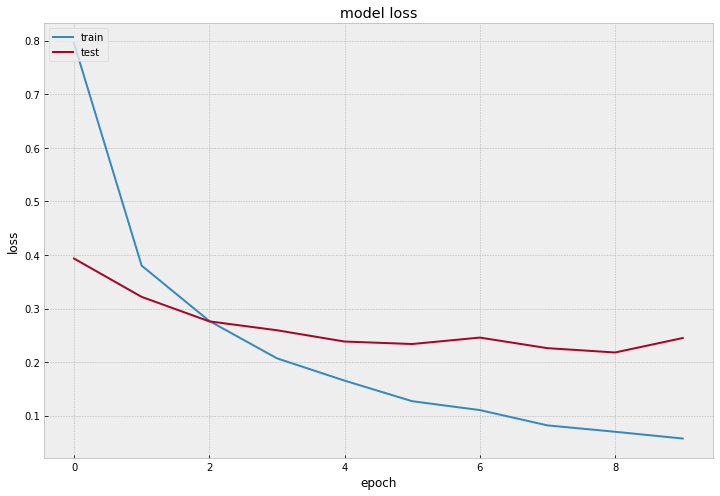

In [0]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Using Tensor Flow (with a CNN)

### a) simple model

In [0]:
# reshape dataset to have a single channel
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
#y_train = y_train.reshape(y_train.shape[0])
#y_test = y_test.reshape(y_test.shape[0])

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, 
                                                           kernel_size=(3, 3), 
                                                           activation='relu', 
                                                           kernel_initializer='he_uniform', 
                                                           input_shape=(28, 28, 1)
                                                          ),
                                    tf.keras.layers.MaxPooling2D((2, 2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
                                    tf.keras.layers.Dense(10, activation='softmax'),
                                   ])

model.compile(optimizer='adam', #SGD(lr=0.01, momentum=0.9)
              loss="sparse_categorical_crossentropy",
              #loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 5408)              0         
                                                                 
 dense_30 (Dense)            (None, 100)               540900    
                                                                 
 dense_31 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_______________________________________________

In [0]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)

Epoch 1/10
252/252 [==============================] - 3s 12ms/step - loss: 0.5385 - accuracy: 0.8401 - val_loss: 0.3585 - val_accuracy: 0.8815
Epoch 2/10
252/252 [==============================] - 3s 12ms/step - loss: 0.1847 - accuracy: 0.9365 - val_loss: 0.2083 - val_accuracy: 0.9327
Epoch 3/10
252/252 [==============================] - 3s 11ms/step - loss: 0.0628 - accuracy: 0.9833 - val_loss: 0.1998 - val_accuracy: 0.9476
Epoch 4/10
 85/252 [=========>....................] - ET

*** WARNING: max output size exceeded, skipping output. ***

252/252 [==============================] - 3s 11ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1748 - val_accuracy: 0.9571
Epoch 8/10
252/252 [==============================] - 3s 13ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1783 - val_accuracy: 0.9595
Epoch 9/10
252/252 [==============================] - 3s 12ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1806 - val_accuracy: 0.9619
Epoch 10/10
252/252 [=============

In [0]:
model.evaluate(X_test, y_test, verbose=1)

53/53 [==============================] - 1s 6ms/step - loss: 0.1848 - accuracy: 0.9589
Out[176]: [0.18478333950042725, 0.9589285850524902]

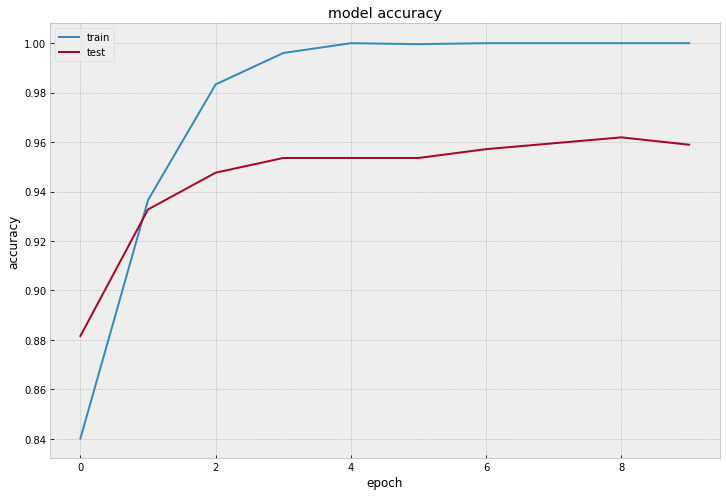

In [0]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

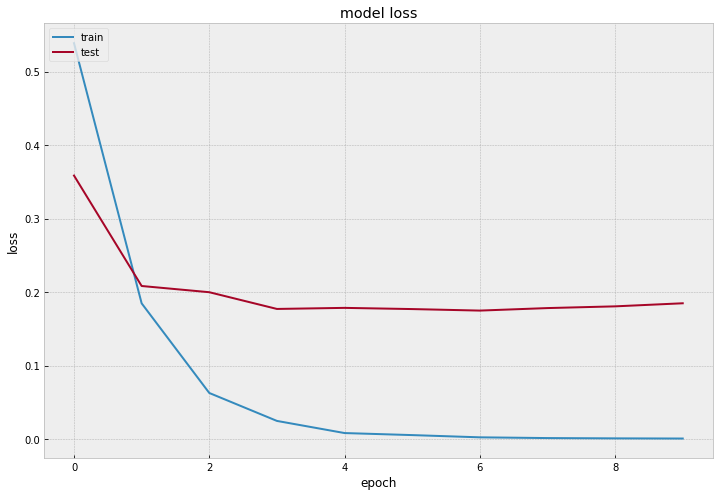

In [0]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### b) slightly bigger model

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, 
                                 kernel_size=(3, 3),
                                 activation='relu',
                                 kernel_initializer='he_uniform',
                                 input_shape=(28, 28, 1)
                                ))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', #tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
              #loss='categorical_crossentropy',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_31 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_16 (Flatten)        (None, 9216)              0         
                                                                 
 dense_32 (Dense)            (None, 128)               1179776   
                                                     

In [0]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1, callbacks=[early_stopping])

Epoch 1/10
79/79 [==============================] - 8s 92ms/step - loss: 0.8205 - accuracy: 0.7349 - val_loss: 0.2653 - val_accuracy: 0.9327
Epoch 2/10
72/79 [==========================>...] - ETA: 0s - loss: 0.3037 - accuracy: 0.9058

*** WARNING: max output size exceeded, skipping output. ***

79/79 [==============================] - 7s 86ms/step - loss: 0.0491 - accuracy: 0.9837 - val_loss: 0.1255 - val_accuracy: 0.9679
Epoch 10/10
79/79 [==============================] - 6s 80ms/step - loss: 0.0449 - accuracy: 0.9849 - val_loss: 0.1195 - val_accuracy: 0.9702
INFO:tensorflow:Assets written to: /tmp/tmpg4vj2fti/model/data/model/assets


In [0]:
model.evaluate(X_test, y_test, verbose=1)

53/53 [==============================] - 1s 16ms/step - loss: 0.1195 - accuracy: 0.9702
Out[182]: [0.11948543787002563, 0.9702380895614624]

In [0]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

53/53 [==============================] - 1s 15ms/step - loss: 0.1195 - accuracy: 0.9702
Test loss: 0.11948543787002563
Test accuracy: 0.9702380895614624


In [0]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.820539,0.734921,0.265308,0.932738
1,0.302526,0.905952,0.181485,0.948810
2,0.198839,0.938095,0.156678,0.951786
3,0.159115,0.946429,0.132008,0.963095
4,0.113820,0.961508,0.131331,0.964286


Out[185]: <matplotlib.legend.Legend at 0x7faf13178760>

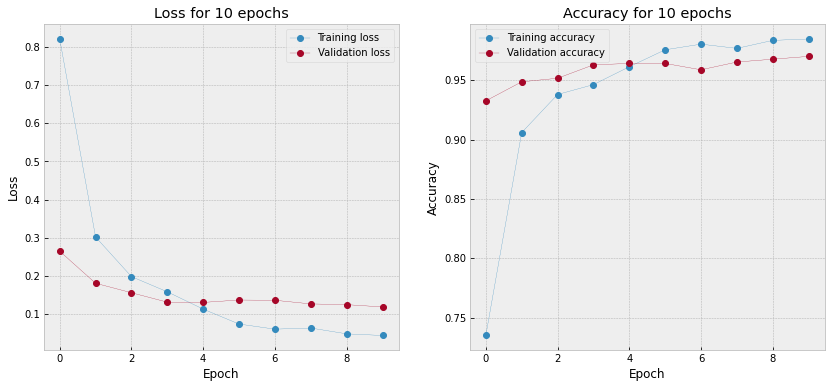

In [0]:
fig = plt.figure(figsize=(14,6))
plt.style.use('bmh')
params_dict = dict(linestyle='solid', linewidth=0.25, marker='o', markersize=6)

plt.subplot(121)
plt.plot(hist_df.loss, label='Training loss', **params_dict)
plt.plot(hist_df.val_loss, label='Validation loss', **params_dict)
plt.title('Loss for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(hist_df.accuracy, label='Training accuracy', **params_dict)
plt.plot(hist_df.val_accuracy, label='Validation accuracy', **params_dict)
plt.title('Accuracy for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### c) [Using the LENET architecture](https://www.pyimagesearch.com/2016/08/01/lenet-convolutional-neural-network-in-python/  )

![](./img/lenet_architecture-768x226.png)

The LeNet architecture was first introduced by LeCun et al. in their 1998 paper, Gradient-Based Learning Applied to Document Recognition. As the name of the paper suggests, the authors’ implementation of LeNet was used primarily for OCR and character recognition in documents.  

The LeNet architecture is straightforward and small, (in terms of memory footprint), making it perfect for teaching the basics of CNNs — it can even run on the CPU (if your system does not have a suitable GPU), making it a great “first CNN”.  

However, if you do have GPU support and can access your GPU via Keras, you will enjoy extremely fast training times (in the order of 3-10 seconds per epoch, depending on your GPU).

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Convolution2D(filters=20, kernel_size = (5, 5), padding = "same", input_shape = (28, 28, 1)))
model.add(tf.keras.layers.Activation(activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides =  (2, 2)))
model.add(tf.keras.layers.Convolution2D(filters=50, kernel_size = (5, 5), padding = "same"))
model.add(tf.keras.layers.Activation(activation= "relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500))
model.add(tf.keras.layers.Activation(activation = "relu"))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation("softmax"))

model.summary()

model.compile(optimizer='adam', #tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
              #loss='categorical_crossentropy',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 28, 28, 20)        520       
                                                                 
 activation_8 (Activation)   (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 14, 50)        25050     
                                                                 
 activation_9 (Activation)   (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 50)         0         
 g2D)                                                

In [0]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

%time history = model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, \
                          validation_data=(X_test, y_test), callbacks=[early_stopping])

model.evaluate(X_test, y_test, verbose=1)

Epoch 1/10
79/79 [==============================] - 7s 77ms/step - loss: 0.6891 - accuracy: 0.7853 - val_loss: 0.2413 - val_accuracy: 0.9286
Epoch 2/10
73/79 [==========================>...] - ETA: 0s - loss: 0.1959 - accuracy: 0.9422

*** WARNING: max output size exceeded, skipping output. ***

79/79 [==============================] - 6s 70ms/step - loss: 0.0070 - accuracy: 0.9992 - val_loss: 0.1580 - val_accuracy: 0.9625
Epoch 9/10
79/79 [==============================] - 6s 71ms/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.1400 - val_accuracy: 0.9613
INFO:tensorflow:Assets written to: /tmp/tmpxw34woum/model/data/model/assets
CPU times: user 1min 20s, sys: 2.8 s, total: 1min 23s
Wall time: 1min 38s
53/53 [==============================] - 1s 16ms/step - loss: 0.1400 - accuracy: 0.9613
Out[187]: [0.14003720879554749, 0.961309552192688]

In [0]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

53/53 [==============================] - 2s 33ms/step - loss: 0.1400 - accuracy: 0.9613
Test loss: 0.14003720879554749
Test accuracy: 0.961309552192688


Out[189]: <matplotlib.legend.Legend at 0x7faf13510520>

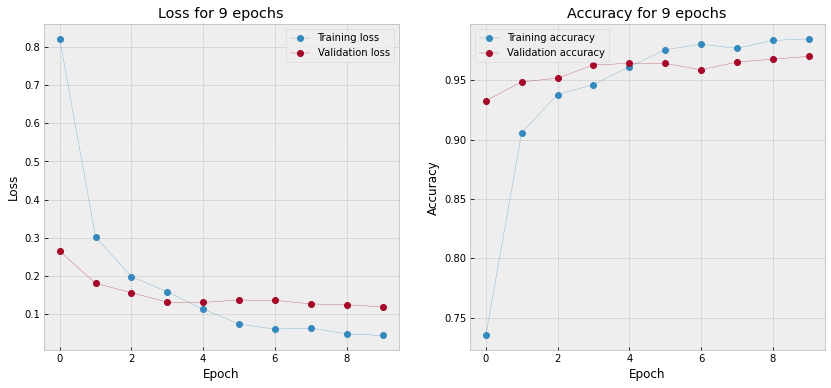

In [0]:
fig = plt.figure(figsize=(14,6))
plt.style.use('bmh')
params_dict = dict(linestyle='solid', linewidth=0.25, marker='o', markersize=6)

plt.subplot(121)
plt.plot(hist_df.loss, label='Training loss', **params_dict)
plt.plot(hist_df.val_loss, label='Validation loss', **params_dict)
plt.title('Loss for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(hist_df.accuracy, label='Training accuracy', **params_dict)
plt.plot(hist_df.val_accuracy, label='Validation accuracy', **params_dict)
plt.title('Accuracy for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### d) Testing a more complex model

![](https://sihamtabik.github.io/LeNet-like-CNN.jpg)

In [0]:
nb_filters_1 = 32 # 64
nb_filters_2 = 64 # 128
nb_filters_3 = 128 # 256
nb_conv = 3

model = tf.keras.Sequential()
model.add(tf.keras.layers.ZeroPadding2D((1,1), input_shape=(28, 28, 1),))
model.add(tf.keras.layers.Conv2D(nb_filters_1, (nb_conv, nb_conv),  activation="relu"))
model.add(tf.keras.layers.ZeroPadding2D((1, 1)))
model.add(tf.keras.layers.Conv2D(nb_filters_1, (nb_conv, nb_conv), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(strides=(2,2)))
model.add(tf.keras.layers.ZeroPadding2D((1, 1)))
model.add(tf.keras.layers.Conv2D(nb_filters_2, (nb_conv, nb_conv), activation="relu"))
model.add(tf.keras.layers.ZeroPadding2D((1, 1)))
model.add(tf.keras.layers.Conv2D(nb_filters_2, (nb_conv, nb_conv), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(strides=(2,2)))
model.add(tf.keras.layers.ZeroPadding2D((1, 1)))
model.add(tf.keras.layers.Conv2D(nb_filters_3, (nb_conv, nb_conv), activation="relu"))
model.add(tf.keras.layers.ZeroPadding2D((1, 1)))
model.add(tf.keras.layers.Conv2D(nb_filters_3, (nb_conv, nb_conv), activation="relu"))
model.add(tf.keras.layers.ZeroPadding2D((1, 1)))
model.add(tf.keras.layers.Conv2D(nb_filters_3, (nb_conv, nb_conv), activation="relu"))
model.add(tf.keras.layers.ZeroPadding2D((1, 1)))
model.add(tf.keras.layers.Conv2D(nb_filters_3, (nb_conv, nb_conv), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(strides=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()

model.compile(optimizer='adam', #tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
              #loss='categorical_crossentropy',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_16 (ZeroPadd  (None, 30, 30, 1)        0         
 ing2D)                                                          
                                                                 
 conv2d_34 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 zero_padding2d_17 (ZeroPadd  (None, 30, 30, 32)       0         
 ing2D)                                                          
                                                                 
 conv2d_35 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                     

In [0]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])
model.evaluate(X_test, y_test, verbose=1)

Epoch 1/10
79/79 [==============================] - 21s 251ms/step - loss: 1.4043 - accuracy: 0.4921 - val_loss: 0.3594 - val_accuracy: 0.9048
Epoch 2/10
71/79 [=========================>....] - ETA: 1s - loss: 0.3003 - accuracy: 0.9049

*** WARNING: max output size exceeded, skipping output. ***

79/79 [==============================] - 22s 286ms/step - loss: 0.0516 - accuracy: 0.9837 - val_loss: 0.1056 - val_accuracy: 0.9714
Epoch 8/10
79/79 [==============================] - 19s 245ms/step - loss: 0.0731 - accuracy: 0.9758 - val_loss: 0.1389 - val_accuracy: 0.9690
INFO:tensorflow:Assets written to: /tmp/tmp68y1iqq8/model/data/model/assets
53/53 [==============================] - 2s 40ms/step - loss: 0.1389 - accuracy: 0.9690
Out[191]: [0.13885778188705444, 0.9690476059913635]

In [0]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

53/53 [==============================] - 2s 41ms/step - loss: 0.1389 - accuracy: 0.9690
Test loss: 0.13885778188705444
Test accuracy: 0.9690476059913635


Out[193]: <matplotlib.legend.Legend at 0x7faf1379a6d0>

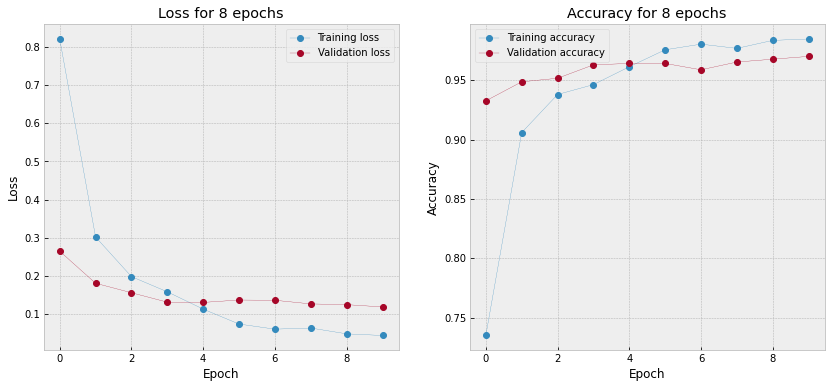

In [0]:
fig = plt.figure(figsize=(14,6))
plt.style.use('bmh')
params_dict = dict(linestyle='solid', linewidth=0.25, marker='o', markersize=6)

plt.subplot(121)
plt.plot(hist_df.loss, label='Training loss', **params_dict)
plt.plot(hist_df.val_loss, label='Validation loss', **params_dict)
plt.title('Loss for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(hist_df.accuracy, label='Training accuracy', **params_dict)
plt.plot(hist_df.val_accuracy, label='Validation accuracy', **params_dict)
plt.title('Accuracy for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#### Pre-trained models  

How can I use pre-trained models in Keras?  
Code and pre-trained weights are available for the following image classification models:  
+ Xception  
+ VGG16  
+ VGG19  
+ ResNet50  
+ Inception v3  

They can be imported from the module [keras.applications](https://keras.io/applications/):

In [0]:
#from tf.keras.applications.xception import Xception
#from tf.keras.applications.vgg16 import VGG16
#from tf.keras.applications.vgg19 import VGG19
#from tf.keras.applications.resnet50 import ResNet50
#from tf.keras.applications.inception_v3 import InceptionV3

#model = VGG16(weights='imagenet', include_top=True)

### Where can i go further?
[Transfer Learning and Fine-Tuning](https://keras.io/guides/transfer_learning/)  
[Visualizing the classification task](http://scs.ryerson.ca/~aharley/vis/fc/)